### Data Dictionary 

|Variable||Data Type||Description|
|--------||---------||-----------|
|Month ||*object*||Months from July 2019 to April 2021|
|State ||*object*||All 8 States in Australia|
|Brand||*integer*||Brand|
|Customers||*integer*||The number of customers betting|
|Value||*integer*||The amount of money those customers bet with|
|Age Group||*integer*||Ages 18 years and above|
|Gender||*object*||Gender|
|VIP Band||*object*||Customer segments in groups from A to E|

The following analysis, will take a look at brand analysis in 2020 determined by the number of customers and dollars bet, based on the other categorical features provided. But to begin with I perform a high level overview of each of the features (except 'vip-band') and see what insight I can gather within each of these. 

__Data Importing and Pre-processing__

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/Data_Analysis_Exercise_Cleaned.csv')
df.head()

,Unnamed: 0,months,year,state,brand,customers,value,age_group,gender,vip_band
0,0,Jul,19,SA,Apple,256,50623,18-24,F,Group A
1,1,Jul,19,SA,Apple,147,34629,18-24,F,Group B
2,2,Jul,19,SA,Apple,36,85034,18-24,F,Group C
3,3,Jul,19,SA,Apple,109,220479,18-24,F,Group D
4,4,Jul,19,SA,Apple,52,15644,18-24,M,Group A


In [3]:
df.columns

Index(['Unnamed: 0', 'months', 'year', 'state', 'brand', 'customers', 'value',
       'age_group', 'gender', 'vip_band'],
      dtype='object')

In [4]:
#dropped unnamed column
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
#Let's first take a look at the overall distribution of data for our numeric features
df.describe()

,year,customers,value
count,47200.000000,47200.000000,4.720000e+04
mean,19.883623,698.247648,5.927562e+05
std,0.652313,2185.743620,1.679035e+06
min,19.000000,11.000000,2.000000e+01
25%,19.000000,66.000000,3.779250e+04
50%,20.000000,173.000000,1.421595e+05
75%,20.000000,495.000000,4.783585e+05
max,21.000000,61759.000000,5.042634e+07


__Distribution of Numerical Variables__

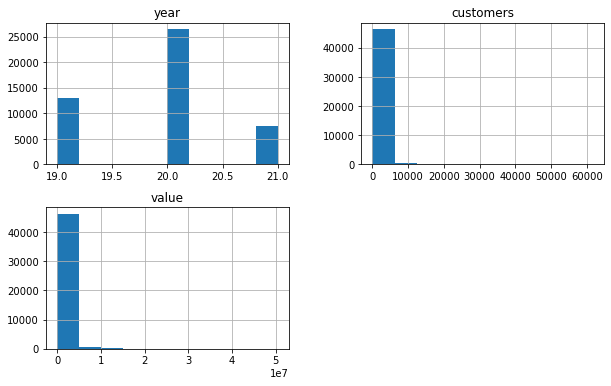

In [6]:
df.hist(figsize=(10, 6));

<span style="color: blue">

- Our distribution of observations for the 'year' feature shows that a majority of our observations are from the year 2020. This reflects our initial overview of the datatset, showing that we only had 6 months of observations gathered for 2019 and only 4 months of observations, gathered thus far for 2021.

/Users/aishakamara/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


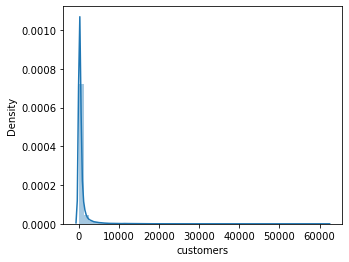

In [7]:
plt.figure(figsize=(5,4))
sns.distplot(df.customers);

/Users/aishakamara/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


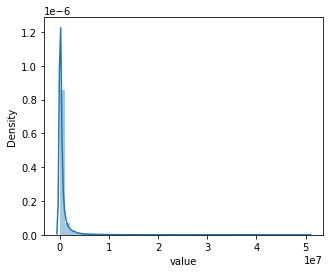

In [8]:
plt.figure(figsize=(5,4))
sns.distplot(df.value);

<span style="color: blue">
    
- For both the 'customer' and 'value' features, we see a skew to the left of the distribution graph, and not a normally/ evenly distributed graph. This means a majority of observations within our data set  are gathered towards the lower end of our number or customers and dollar value bet, range. This may be an indication of the vast differences we may see when analyzing these two features in combination with categorical features, e.g. states and gender. 
    
- In regards to total dollar value of bets by customers, this skewness may indicate that a majority of customers are much more conservative in regards to their betting behavior. As we move forward with our analysis we'll be determining to see what segments may deviate from this behavior, i.e. larger spenders/betters. 

__Check for Outliers__ 

/Users/aishakamara/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


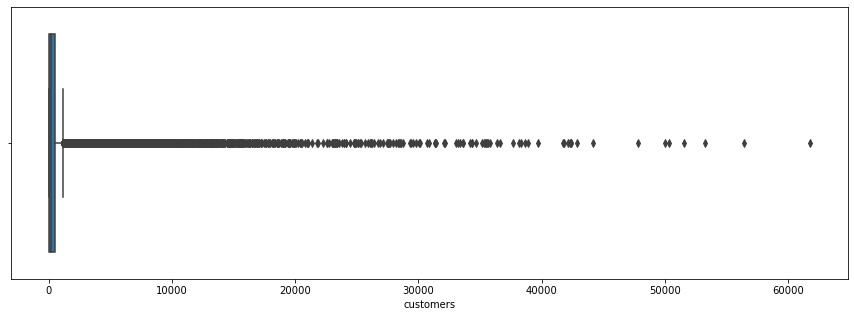

In [9]:
fig, ax = plt.subplots(figsize = (15,5))
sns.boxplot(df.customers);

/Users/aishakamara/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


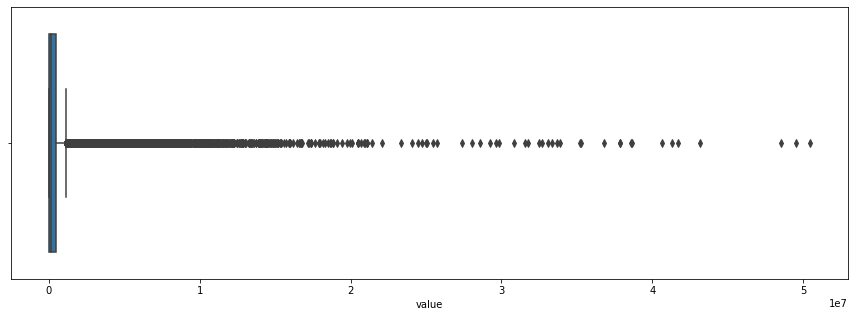

In [10]:
fig, ax = plt.subplots(figsize = (15,5))
sns.boxplot(df.value);

<span style="color: blue"> Although we see a range of values outside of the 50th and 75th percentile for our 'customers' and 'value' features,  I don't think this is cause for concern, as we are not only looking at several months over 3 years, but also varying states and age groups, there is bound to be some disparity. Also note that the difference between our minimum and maximum number of customers and dollars bet within each feature are quite vast. 
 

### YEARLY SUMMARY

Now that we've taken a look at the distribution and any concerning outliers, let's take a further look at the data at hand and see what we can gather regarding our customer growth as well as dollar value, in the form of bet's made by our customers. 

As mentioned earlier, the data set entails observations from July 2019 to April 2021, so we don't have a complete 12 months of data for each of the three years in order to perform a holistic comparison of all three years. I've decided to focus my  analysis on 2020 data as this gives me a full 12 month picture of activity. Before I do so, I'd like to take a high level overview activity during the few months in both 2019 and 2021.

__Customer Activity 2019-2021__

In [11]:
#for aesthetic reasons changed the shortened years to full years
df['year'] = pd.Series(['2019' if val == 19 
                                 else '2020' if val == 20
                                 else "2021" if (val == 21)
                                 else "Other" for val in df['year']], index=df.index)

In [12]:
print('Betting Customers By Year')
grouped =df.groupby('year')
grouped['customers'].agg([np.sum,np.mean])

Betting Customers By Year


,sum,mean
year,,
2019,8679221,662.131599
2020,17948975,677.908184
2021,6329093,831.134997


<span style="color: blue"> We only have data gathered for 6 months in 2019 and only 4 months 2021, so it would be expected that the total numbers would be smaller in comparison to our 2020 total. If we were to assume the same level of growth occurred in the fist half of 2019 as we see for the second half of the year, we could calculate a total number of : 8,679,221 x 2 = __17,358,442__ betting customers in 2019. When compared to 2020 numbers, we see an increase of 590,533 or 3.29% customers from 2019 to 2020. Once again this is based on the assumption that there weren't any real shocks in the first half of 2019 and we saw steady growth. 

__Dollar Value Activity 2019-2021__

In [13]:
df.value.sum()

27978091253

In [14]:
print('Dollars Bet By Customers By Year')
grouped =df.groupby('year')
grouped['value'].agg([np.sum, np.mean])

Dollars Bet By Customers By Year


,sum,mean
year,,
2019,6179053574,471395.603753
2020,16214813141,612411.267931
2021,5584224538,733319.046356


<span style="color: blue"> As expected, we see our strongest total dollar value bet in 2020, sums up to a total of $16,214,813,141. 

__Betting Customers Monthly Activity 2019-2021__

In [15]:
print('Customer Summary Per Month')
grouped =df.groupby([(df.months), (df.year)])
grouped['customers'].agg([np.sum,np.mean])

Customer Summary Per Month


sum         mean
months year                      
Apr    2020  1097548   511.438956
       2021  1680649   944.715571
Aug    2019  1274377   604.543169
       2020  1792344   746.188177
Dec    2019  1153442   538.739841
       2020  1252234   628.631526
Feb    2020  1095699   520.274929
       2021  1450941   753.344237
Jan    2020  1197625   572.752272
       2021  1516241   765.391721
Jul    2019  1343888   630.933333
       2020  1635117   701.165094
Jun    2020  1405578   627.770433
Mar    2020  1150319   548.554602
       2021  1681262   871.571799
May    2020  1235341   538.040505
Nov    2019  1926962   835.992191
       2020  2317882  1068.640848
Oct    2019  1557682   687.718322
       2020  2044957   940.210115
Sep    2019  1422870   659.041223
       2020  1724331   709.017681

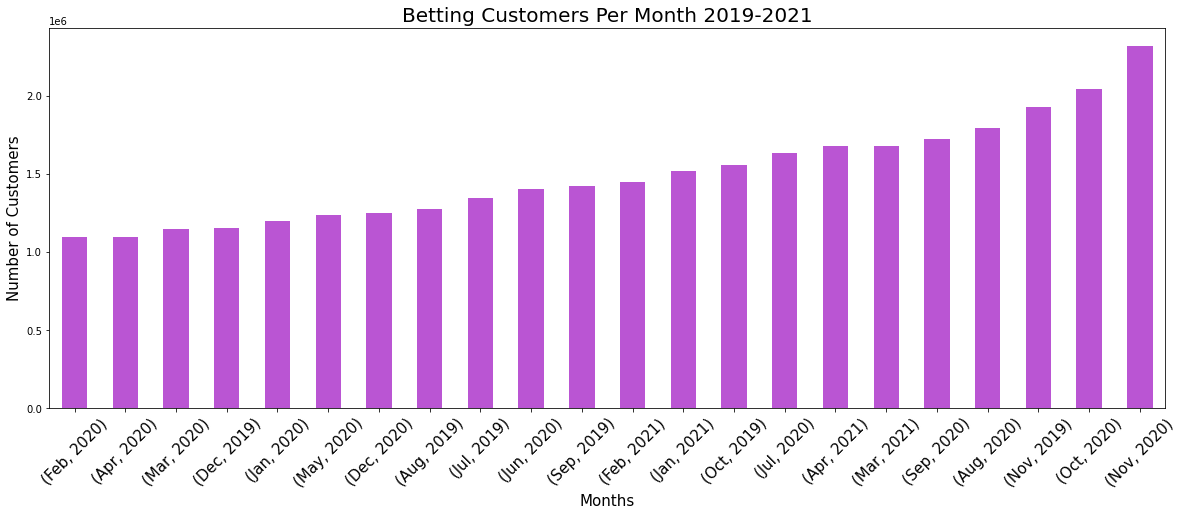

In [16]:
fig, ax = plt.subplots(figsize = (20,7))
grouped['customers'].sum().sort_values().plot(kind='bar', color = 'mediumorchid')
plt.title('Betting Customers Per Month 2019-2021', fontsize = 20)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)
plt.xticks(rotation = 45, fontsize = 15);

<span style="color: blue">

__Key Takeaways:__
- The lowest number of betting customers were in February 2020, April 2020, and March 2020. 
- November 2019, October 2020, November 2020 indicated the highest numbers of customers betting across all months across all three years. 
 - As the month of November looked to be one of the most active for betting customers for both 2019 and 2020, I decided to do some research to support the numbers. Through my research I noticed that Soccer and Cricket season typically begin in these months. As Cricket, especially being one of Australia's national sports and both soccer and cricket being some of the most commonly bet on sports, I'd hypothesize that the increase in the number of customers betting may be correlated to the start of their seasons. Of course, I'd need to gather data that categorizes what type of sports customers are actually betting on, in order to either prove or disprove this initial hypothesis. 
I believe a further delve into specific sports could help us better determine not only when to market but also what sort of marketing materials to tailor towards specific customers.  
<span style="color: blue">
    
[Source 1](https://brewquets.com.au/blogs/news/australian-sports-seasons-annual-calendar)
    
[Source 2](https://www.theleaguepaper.com/guest-blogs/11208/the-most-popular-sports-for-betting-in-australia/)

__Dollar Value Activity By Month__

In [17]:
print('Dollars Bet Per Month 2019-2021')
grouped =df.groupby([(df.months), (df.year)])
grouped['value'].agg([np.sum,np.mean])

Dollars Bet Per Month 2019-2021


sum           mean
months year                           
Apr    2020  1072088035  499575.039609
       2021  1408733151  791867.988196
Aug    2019   989635097  469466.364801
       2020  1765459239  734995.519983
Dec    2019  1007858254  470741.828118
       2020  1280220534  642680.990964
Feb    2020   869100316  412678.212726
       2021  1263813920  656185.835929
Jan    2020   959423993  458835.003826
       2021  1521895914  768246.296820
Jul    2019   948987026  445533.815023
       2020  1638609015  702662.527873
Jun    2020  1112563089  496901.781599
Mar    2020   889427290  424142.722938
       2021  1389781553  720467.368066
May    2020  1183429750  515431.075784
Nov    2019  1218240444  528520.800000
       2020  1736134941  800431.047026
Oct    2019  1044964988  461353.195585
       2020  2043937564  939741.408736
Sep    2019   969367765  448989.238073
       2020  1664419375  684382.966694

In [18]:
#BuPu, cool, cool_r, plasma_r, Purples_r

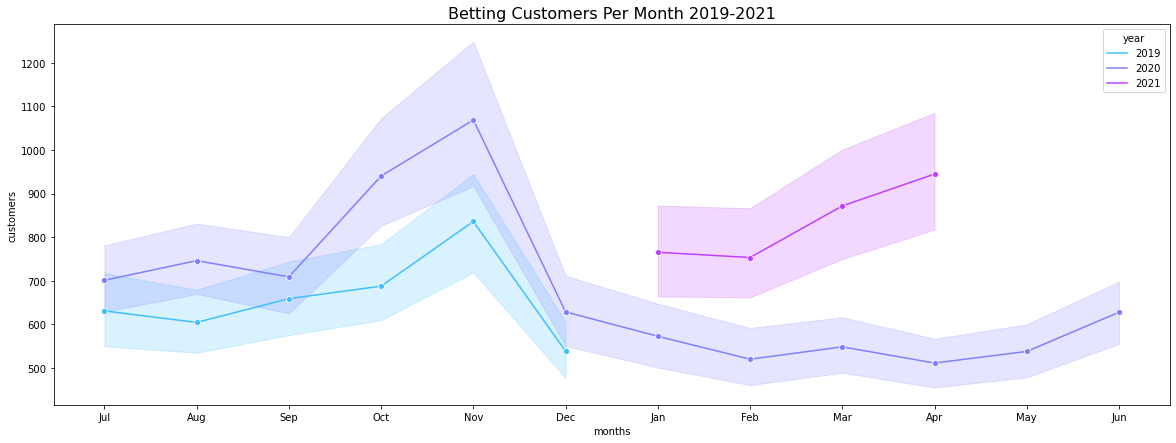

In [19]:
fig, ax = plt.subplots(figsize = (20,7))
sns.lineplot(data=df, x="months", y="customers", hue="year", marker = 'o', palette = 'cool')
plt.title('Betting Customers Per Month 2019-2021', fontsize = 16);

<span style="color: blue">
The graph above starts from July 2019 the start of our dataset. We can clearly see increases and decreases in the numbers of customers betting over the 3 years in the dataset. 

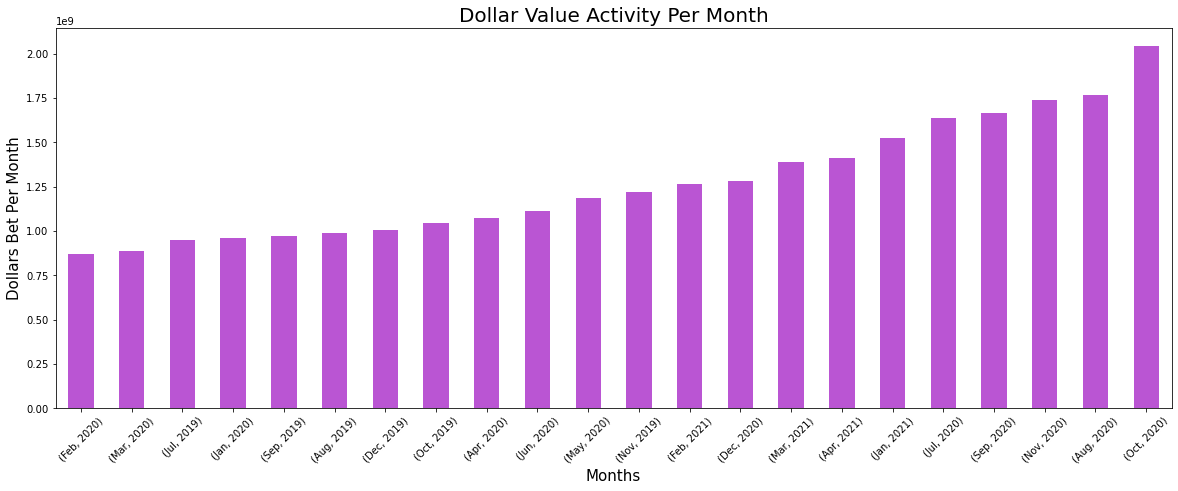

In [20]:
fig, ax = plt.subplots(figsize = (20,7))
grouped['value'].sum().sort_values().plot(kind='bar', color = 'mediumorchid')
plt.title('Dollar Value Activity Per Month', fontsize = 20)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Dollars Bet Per Month', fontsize = 15)
plt.xticks(rotation = 45);

<span style="color: blue">
    
    
__Key Takeaways:__
- Feb 2020, proved to be the month, across all three years, with not only the lowest number of customers betting, but also the lowest amount of money those customers bet with.
- Although we only have four months (Jan-Apr) of data for 2021, all four months, show high activity, with each of the four months found towards the right of the graph displayed above. 
- Although  November 2019, October 2020, November 2020 showed the highest amounts of customers betting, this did not perfectly equate to high dollar values in those months. Rather customers betting in November 2020, August 2020, and October 2020 bet the highest dollar amounts across all 22 months within the dataset. 
    

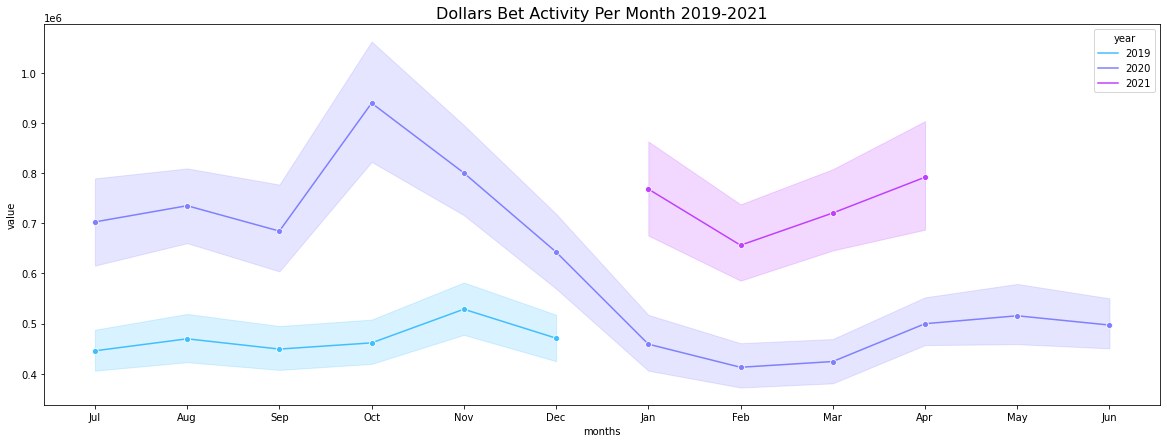

In [21]:
fig, ax = plt.subplots(figsize = (20,7))
sns.lineplot(data=df, x="months", y="value", hue="year", marker = 'o', palette = 'cool')
plt.title('Dollars Bet Activity Per Month 2019-2021', fontsize = 16);

<span style="color: blue">
The graph above starts from July 2019 the start of our dataset. We can clearly see increases and decreases in the amount of money customers bet with over the 3 years in the dataset.


### 2020 MARKETING DATA ANALYSIS


As stated earlier, I've decided to focus on 2020 data, as this is the only year that provides me with a full 12 months of data. 

In [22]:
#Creating new dataframes filtered by year. 
df19 = df[df['year']=='2019']

In [23]:
df20 = df[df['year'] == '2020']

In [24]:
df21 = df[df['year'] == '2021']

In [25]:
df20.head()

,months,year,state,brand,customers,value,age_group,gender,vip_band
13108,Jan,2020,SA,Apple,339,43829,18-24,F,Group A
13109,Jan,2020,SA,Apple,123,102577,18-24,F,Group B
13110,Jan,2020,SA,Apple,62,34858,18-24,F,Group C
13111,Jan,2020,SA,Apple,31,88735,18-24,F,Group E
13112,Jan,2020,SA,Apple,163,27801,18-24,M,Group A


In [26]:
df20.shape

(26477, 9)

<span style="color: blue">
I'm left with 26,477 observations and 9 features

__ANALYSIS BY YEAR__

__Betting Customers__

In [27]:
print('Betting Customers 2020 ')
grouped = df20.groupby('year')
grouped['customers'].agg([np.sum, np.mean])

Betting Customers 2020 


,sum,mean
year,,
2020,17948975,677.908184


<span style="color: blue">
A total number of 1,7948,975 customers bet in 2020 across all categories.  

__Dollars Bet__

In [28]:
print('Dollars Bet 2020')
grouped = df20.groupby('year')
grouped['value'].agg([np.sum, np.mean])

Dollars Bet 2020


,sum,mean
year,,
2020,16214813141,612411.267931


<span style="color: blue">
From our total betting customers, they betted a total amount of $16,214,813,141 (Billion) in 2020 across all categories.

__ANALYSIS BY MONTH__

__Betting Customers__

In [29]:
print('2020 Betting Customers Per Month')
grouped = df20.groupby(['months'])
grouped['customers'].agg([np.sum,np.mean])

2020 Betting Customers Per Month


,sum,mean
months,,
Apr,1097548,511.438956
Aug,1792344,746.188177
Dec,1252234,628.631526
Feb,1095699,520.274929
Jan,1197625,572.752272
Jul,1635117,701.165094
Jun,1405578,627.770433
Mar,1150319,548.554602
May,1235341,538.040505


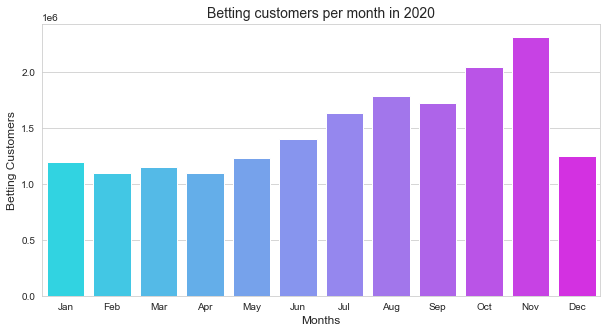

In [30]:
ordered= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec']
month = df20.groupby(by =['months'])['customers'].sum().reset_index()
plt.figure(figsize = (10,5))
sns.set_style('whitegrid')
sns.barplot(x = 'months',
           y = 'customers',
            order = ordered,
           data = month, 
           palette = 'cool')
plt.xlabel('Months', fontsize =12)
plt.ylabel('Betting Customers', fontsize =12)
plt.title('Betting customers per month in 2020', fontsize = 14)
plt.show();

 <span style="color: blue">
    
- Per the table and graph displayed above, August (1,792,344), October (2,044,957), and November (2,317,882) round up the 3 months with the highest number of betting customers in 2020. 
     

__Dollars Bet__

In [31]:
print('Dollars Bet Per Month')
grouped = df20.groupby(['months'])
grouped['value'].agg([np.sum,np.mean])

Dollars Bet Per Month


,sum,mean
months,,
Apr,1072088035,499575.039609
Aug,1765459239,734995.519983
Dec,1280220534,642680.990964
Feb,869100316,412678.212726
Jan,959423993,458835.003826
Jul,1638609015,702662.527873
Jun,1112563089,496901.781599
Mar,889427290,424142.722938
May,1183429750,515431.075784


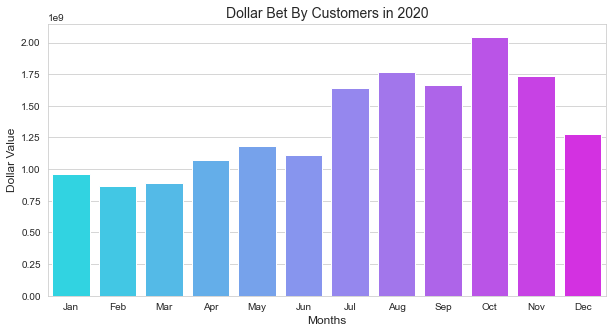

In [32]:
ordered= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec']
month = df20.groupby(by =['months'], as_index = False)['value'].sum()
plt.figure(figsize = (10,5))
sns.set_style('whitegrid')
sns.barplot(x = 'months',
           y = 'value',
           data = month,
            order = ordered,
           palette = 'cool')
plt.xlabel('Months', fontsize =12)
plt.ylabel('Dollar Value', fontsize =12)
plt.title('Dollar Bet By Customers in 2020', fontsize = 14)
plt.show();

  <span style="color: blue">   
     
- Although we noted that the highest number of betting customers occurred in the month of November, this did not equate to the highest dollar value spent being in the same month. Instead we see that October provided the most bets in terms of dollars spent, at $2,043,937,564. 
    
 
- For both number of betting customers and dollar value of bets made by these customers, February was our lowest performing month with a total of 1,095,699 customers betting a total of $869,100,316.
  <span style="color: blue">    

__ANALYSIS BY STATE__

In [33]:
print('Betting Customers By State')
grouped =df20.groupby([(df20.state)])
grouped['customers'].agg([np.sum,np.mean])

Betting Customers By State


,sum,mean
state,,
ACT,70343,66.929591
NSW,5705921,1258.751599
NT,113385,72.729314
QLD,2491161,586.293481
SA,1302474,330.997205
TAS,306407,128.580361
VIC,5415729,1196.581750
WA,2543555,599.753596


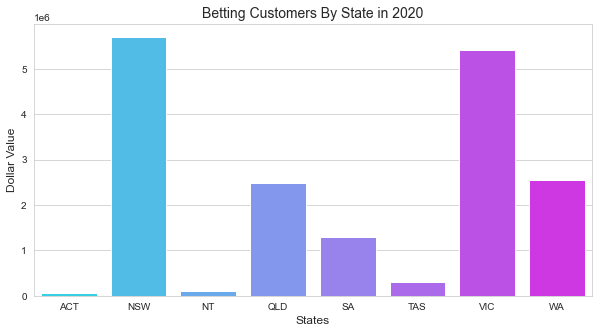

In [34]:
per_state = df20.groupby(by =['state'], as_index = False)['customers'].sum()
plt.figure(figsize = (10,5))
sns.set_style('whitegrid')
sns.barplot(x = 'state',
           y = 'customers',
           data = per_state,
           palette = 'cool')
plt.xlabel('States', fontsize =12)
plt.ylabel('Dollar Value', fontsize =12)
plt.title('Betting Customers By State in 2020', fontsize = 14)
plt.show();

<span style="color: blue"> 
NSW and Victoria resulted in the states that had the largest number of betting customers, an average of 1,258 and 1,196 customers respectively for 2020. This may not be surprising as these are both Australia's most populous states. 

In [35]:
print('Dollar Value Spent By Betting Customers By State')
grouped =df20.groupby([(df20.state)])
grouped['value'].agg([np.sum,np.mean])

Dollar Value Spent By Betting Customers By State


,sum,mean
state,,
ACT,64243899,6.112645e+04
NSW,5685844519,1.254323e+06
NT,88918308,5.703548e+04
QLD,1793901972,4.221939e+05
SA,996337423,2.531988e+05
TAS,216749618,9.095662e+04
VIC,5507878914,1.216942e+06
WA,1860938488,4.387971e+05


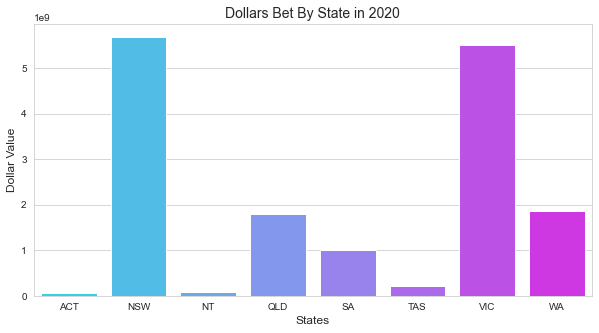

In [36]:
per_state = df20.groupby(by =['state'], as_index = False)['value'].sum()
plt.figure(figsize = (10,5))
sns.set_style('whitegrid')
sns.barplot(x = 'state',
           y = 'value',
           data = per_state,
           palette = 'cool')
plt.xlabel('States', fontsize =12)
plt.ylabel('Dollar Value', fontsize =12)
plt.title('Dollars Bet By State in 2020', fontsize = 14)
plt.show();

<span style="color: blue"> 
* Having the largest quantity of betting customers also lead to higher dollar amounts used to bet within these two states as well. A total amount of 5,685,844,519 and $5,507,878,914 billion respectively. 

__ANALYSIS BY AGE GROUP__

In [37]:
print('Customers Per Age Group 2020')
grouped = df20.groupby([(df20.age_group)])
grouped['customers'].agg([np.sum,np.mean])

Customers Per Age Group 2020


,sum,mean
age_group,,
18-24,2293542,435.042109
25-34,4771497,808.591256
35-44,2496465,581.249127
45-54,1632997,420.767070
55-64,630317,334.208378
65+,6124157,1168.286341


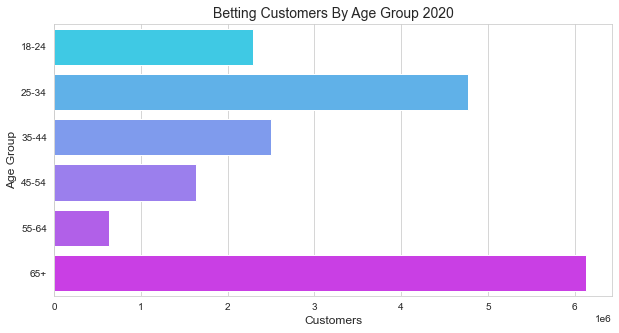

In [38]:
ages = df20.groupby(by =['age_group'], as_index = False)['customers'].sum()
plt.figure(figsize = (10,5))
sns.set_style('whitegrid')
sns.barplot(x = 'customers',
           y = 'age_group',
           data = ages,
           palette = 'cool')
plt.xlabel('Customers', fontsize =12)
plt.ylabel('Age Group', fontsize =12)
plt.title('Betting Customers By Age Group 2020', fontsize = 14)
plt.show();

In [39]:
breakdown = df20.groupby('age_group')['customers'].sum()
breakdown = breakdown.div(breakdown.sum().astype(float)).round(2)*100

<AxesSubplot:title={'center':'PIE CHART OF CUSTOMERS BY AGE GROUP'}, ylabel='age_group'>

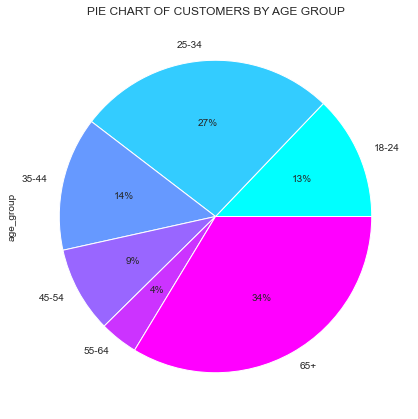

In [40]:
fig = plt.figure(figsize =(7,8))
breakdown.plot.pie(label=('age_group'), title = "PIE CHART OF CUSTOMERS BY AGE GROUP",colormap='cool', autopct='%1.0f%%')

In [41]:
print('Dollars Bet Per Age Group for 2020')
grouped = df20.groupby([(df20.age_group)])
grouped['value'].agg([np.sum,np.mean])

Dollars Bet Per Age Group for 2020


,sum,mean
age_group,,
18-24,2074754329,393542.171662
25-34,4990061695,845629.841552
35-44,2117943791,493118.461234
45-54,1594123849,410750.798506
55-64,543987508,288434.521739
65+,4893941969,933602.054369


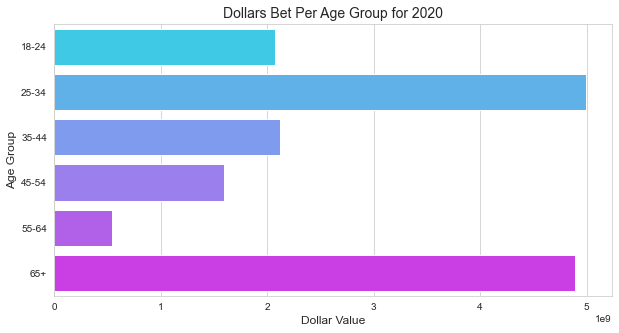

In [42]:
ages = df20.groupby(by =['age_group'], as_index = False)['value'].sum()
plt.figure(figsize = (10,5))
sns.set_style('whitegrid')
sns.barplot(x = 'value',
           y = 'age_group',
           data = ages,
           palette = 'cool')
plt.xlabel('Dollar Value', fontsize =12)
plt.ylabel('Age Group', fontsize =12)
plt.title('Dollars Bet Per Age Group for 2020', fontsize = 14)
plt.show();

In [43]:
breakdown = df20.groupby('age_group')['value'].sum()
breakdown = breakdown.div(breakdown.sum().astype(float)).round(2)*100

<AxesSubplot:title={'center':'PIE CHART OF DOLLARS BET BY AGE GROUP'}, ylabel='age_group'>

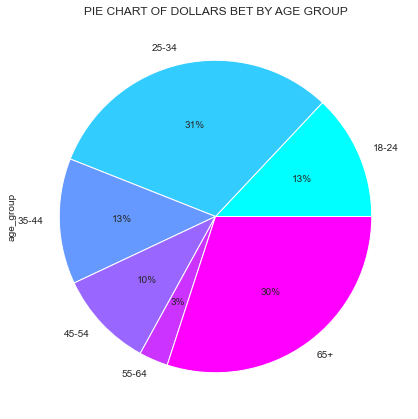

In [44]:
fig = plt.figure(figsize =(7,8))
breakdown.plot.pie(label=('age_group'), title = "PIE CHART OF DOLLARS BET BY AGE GROUP",colormap='cool', autopct='%1.0f%%')

  <span style="color: blue"> 
    
    
    
- The age groups leading the way with the most betting customers were those 65 plus, followed by customers 25-34 years of age. This also translated into the amount of dollars used to bet. These age groups were also the leading demographic in dollars bet. Although in this case, our 25-35 year old customers were betting more money, a total of 4,990,061,695 dollars, compared to their 65 plus year old counterparts who totaled an amount of $4,893,941,969.
    - It would be interesting to gather data to see, especially for these two groups, how frequently they bet, and if they are betting big on major events or being more risk-averse and betting smaller amounts spread across a number of events. 

In [45]:
x = df20.groupby(by =['age_group'])['value'].sum()
x.sort_values(ascending = False)

age_group
25-34    4990061695
65+      4893941969
35-44    2117943791
18-24    2074754329
45-54    1594123849
55-64     543987508
Name: value, dtype: int64

I wanted to take a step further and see how the quantity of betting customers was divided up across states.

In [46]:
print('Customers Per State and Age Group in 2020')
grouped = df20.groupby([(df20.state), df20.age_group])
grouped['customers'].agg([np.sum,np.mean])

Customers Per State and Age Group in 2020


sum         mean
state age_group                      
ACT   18-24         5411    34.909677
      25-34        22047    52.997596
      35-44         6000    66.666667
      45-54        10055    67.033333
      55-64         4327    83.211538
      65+          22503   119.696809
NSW   18-24       724407   812.115471
      25-34      1777724  1977.446051
      35-44       468308   683.661314
      45-54       607734   853.558989
      55-64       298461   667.697987
      65+        1829287  2037.067929
NT    18-24        12604    33.700535
      25-34        43662    72.407960
      35-44        11495    86.428571
      45-54        14901   104.936620
      55-64          378    37.800000
      65+          30345   102.171717
QLD   18-24       413986   462.037946
      25-34       532973   625.555164
      35-44       610187   739.620606
      45-54        90720   188.607069
      55-64        67319   199.759644
      65+         775976   904.400932
SA    18-24       178867   239.447122
      25-34       233871   305.314621
      35-44       234423   375.076800
      45-54       141724   226.396166
      55-64       145422   342.976415
      65+         368167   492.860776
TAS   18-24        33006    73.838926
      25-34        49334    85.058621
      35-44        36199   103.425714
      45-54        30042    97.856678
      55-64        16391    94.201149
      65+         141435   269.400000
VIC   18-24       597058   666.359375
      25-34      1516149  1684.610000
      35-44       568830   703.997525
      45-54       563255   702.312968
      55-64        57431   247.547414
      65+        2113006  2379.511261
WA    18-24       328203   379.425434
      25-34       595737   673.149153
      35-44       561023   720.183569
      45-54       174566   264.093797
      55-64        40588   193.276190
      65+         843438  1002.898930

  <span style="color: blue"> 

    
__Key Takeaways:__     
- The 65+ age demographic of our customer base is the largest within all states with the exception of the Northern Territory. 
- In Tasmania, we see the most drastic disparity within age groups. We see the highest total of 141,435 (65+) customers within that state, with the second largest number of customers (25-34 yrs) being a total of 49,334, an approximately 65% difference between the two age groups. This large disparity in our Tasmania market may be something I think is significant for us to delve deeper into, to at least determine if it's worth trying to close the gap between the age groups or simply focus on our largest age group (65+) moving forward. 

__Dollars Bet__

In [47]:
print('Dollars Bet Per State and Age Group in 2020')
grouped = df20.groupby([(df20.state), df20.age_group])
grouped['value'].agg([np.sum,np.mean])

Dollars Bet Per State and Age Group in 2020


sum          mean
state age_group                          
ACT   18-24         3179505  2.051294e+04
      25-34        21126173  5.078407e+04
      35-44         6174128  6.860142e+04
      45-54        10509433  7.006289e+04
      55-64         3402742  6.543735e+04
      65+          19851918  1.055953e+05
NSW   18-24       716326031  8.030561e+05
      25-34      1911018374  2.125716e+06
      35-44       591264164  8.631594e+05
      45-54       689858657  9.689026e+05
      55-64       300822909  6.729819e+05
      65+        1476554384  1.644270e+06
NT    18-24        11477408  3.068826e+04
      25-34        34475468  5.717325e+04
      35-44        14858681  1.117194e+05
      45-54         8471685  5.965975e+04
      55-64          139354  1.393540e+04
      65+          19495712  6.564213e+04
QLD   18-24       312555486  3.488342e+05
      25-34       485596257  5.699487e+05
      35-44       373390826  4.525949e+05
      45-54        79302485  1.648700e+05
      55-64        49432263  1.466833e+05
      65+         493624655  5.753201e+05
SA    18-24       151741066  2.031340e+05
      25-34       251445289  3.282576e+05
      35-44       157882912  2.526127e+05
      45-54        92723188  1.481201e+05
      55-64        96420152  2.274060e+05
      65+         246124816  3.294844e+05
TAS   18-24        22677170  5.073192e+04
      25-34        38793166  6.688477e+04
      35-44        36004750  1.028707e+05
      45-54        27630566  9.000184e+04
      55-64         9032003  5.190806e+04
      65+          82611963  1.573561e+05
VIC   18-24       605782766  6.760968e+05
      25-34      1688496685  1.876107e+06
      35-44       574640341  7.111885e+05
      45-54       560792545  6.992426e+05
      55-64        45331067  1.953925e+05
      65+        2032835510  2.289229e+06
WA    18-24       251014897  2.901906e+05
      25-34       559110283  6.317630e+05
      35-44       363727989  4.669165e+05
      45-54       124835290  1.888582e+05
      55-64        39407018  1.876525e+05
      65+         522843011  6.216920e+05

  <span style="color: blue">
As we've noted with this data set thus far, a high number of customers does not perfectly equate to larger dollar amounts being spent. Unlike the results for our number of betting customers above, we see some the 65+ age groups are being outspent by their 25-35 age group counter parts. They only hold the reigns in Tasmania, Queensland, and Victoria. WIth this knowledge I'd like to see if these states may have a higher demographic of retirees, and most importantly, retirees with higher disposable income. 

__GENDER ANALYSIS__

In [48]:
print('Customers By Gender 2020')
grouped =df20.groupby([(df20.gender)])
grouped = grouped['customers'].agg([np.sum,np.mean])
grouped

Customers By Gender 2020


,sum,mean
gender,,
F,6217892,560.827275
M,11731083,762.253606


In [49]:
breakdown = df20.groupby('gender')['customers'].sum()
breakdown = breakdown.div(breakdown.sum().astype(float)).round(2)*100

<AxesSubplot:title={'center':'PERCENTAGE CUSTOMERS BY AGE GROUP'}, ylabel='gender'>

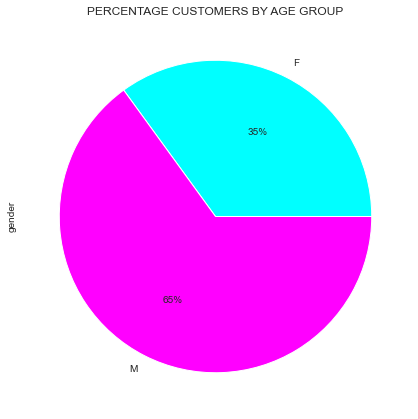

In [50]:
fig = plt.figure(figsize =(7,8))
breakdown.plot.pie(label=('gender'), title = "PERCENTAGE CUSTOMERS BY AGE GROUP",colormap='cool', autopct='%1.0f%%')

In [51]:
print('Dollars Bet By Gender 2020')
grouped =df20.groupby([(df20.gender)])
grouped['value'].agg([np.sum,np.mean])

Dollars Bet By Gender 2020


,sum,mean
gender,,
F,3970355412,358109.083792
M,12244457729,795611.288434


In [52]:
breakdown = df20.groupby('gender')['value'].sum()
breakdown = breakdown.div(breakdown.sum().astype(float)).round(2)*100

<AxesSubplot:title={'center':'PERCENTAGE OF DOLLARS BET BY AGE GROUP'}, ylabel='gender'>

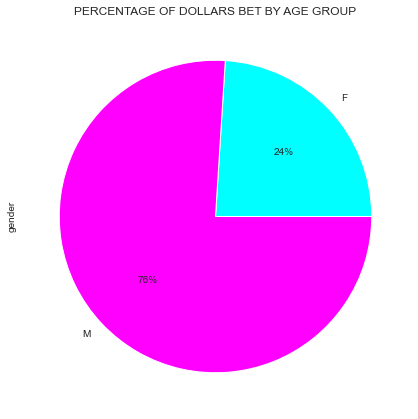

In [53]:
fig = plt.figure(figsize =(7,8))
breakdown.plot.pie(label=('gender'), title = "PERCENTAGE OF DOLLARS BET BY AGE GROUP",colormap='cool', autopct='%1.0f%%')

  <span style="color: blue">
    
-  A simple overview of our betting customers by gender, shows that we have more male customers in comparison to our female customers. With our female customer only making up 35% our total number of customers. 
    
- In terms of total dollars bet, our male customers bet 3 times over our female customers. 
- For 2020 on average our male customers bet 795,611 dollars compared to a much conservative average in comparison of $358,109 by our female customers.

Let's take a look at breakdown by age group

In [54]:
print('Customers Per Gender and Age Group for 2020')
grouped = df20.groupby([(df20.age_group), df20.gender])
grouped['customers'].agg([np.sum,np.mean])

Customers Per Gender and Age Group for 2020


sum         mean
age_group gender                      
18-24     F        893427   373.038413
          M       1400115   486.657977
25-34     F       1202843   465.496517
          M       3568654  1075.867953
35-44     F        855594   490.874355
          M       1640871   642.974530
45-54     F        577544   385.286191
          M       1055453   443.095298
55-64     F         52792   134.673469
          M        577525   386.562918
65+       F       2635692  1065.356508
          M       3488465  1260.283598

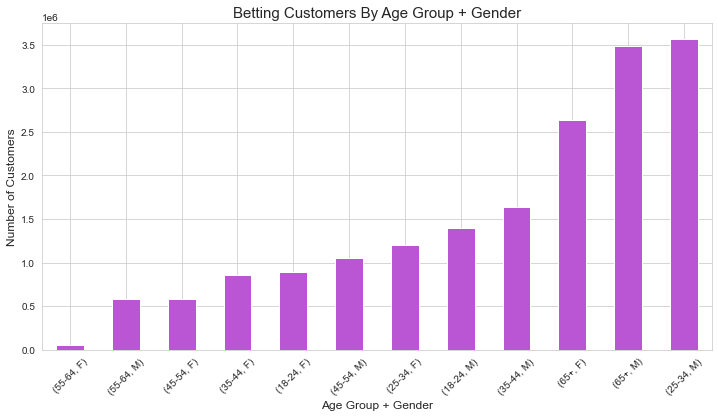

In [55]:
fig, ax = plt.subplots(figsize = (12,6))
grouped['customers'].sum().sort_values().plot(kind='bar', color = 'mediumorchid')
plt.title('Betting Customers By Age Group + Gender', fontsize = 15)
plt.xlabel('Age Group + Gender', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.xticks(rotation = 45, fontsize = 10);

  <span style="color: blue">
    
__Key Takeaways__
- Our male customers 65 + and in the 25-34 age ranges had our highest number of customers.  
- Our lowest number of customers were female customers ages ranging 55-64 years. 

In [56]:
breakdown = pd.pivot_table(df20, index=['age_group'], columns = ['gender'], values=['customers'], aggfunc='sum')

<Figure size 432x288 with 0 Axes>

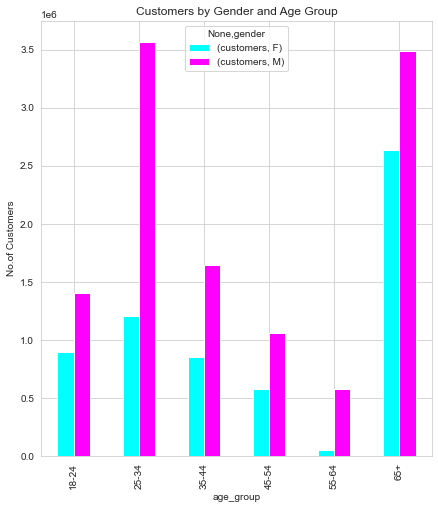

In [57]:
plt.figure();breakdown.plot.bar(figsize=(7,8),title='Customers by Gender and Age Group', colormap ='cool'), \
plt.xlabel('age_group'),
plt.ylabel('No.of Customers');

  <span style="color: blue">
    
__Key Takeaways:__
- Across all age groups, male betting customers lead in terms of quantity.  The disparity between the number of customer by gender, stands out the most within the 55-64 year age group, with our female betting customers making up only 8.3% of customers within this group.

- As further research and to gain a better understanding of our customer base, I'd be curious to see what is bringing about this stark difference and how best, if the return value makes sense, we can do to better market to this particular demographic to see an increase in the number of betting customers. 

In [58]:
print('Dollars Bet Per Gender and Age Group in 2020')
grouped = df20.groupby([(df20.age_group), df20.gender])
grouped['value'].agg([np.sum,np.mean])

Dollars Bet Per Gender and Age Group in 2020


sum          mean
age_group gender                          
18-24     F        633786295  2.646289e+05
          M       1440968034  5.008578e+05
25-34     F        852728857  3.300034e+05
          M       4137332838  1.247312e+06
35-44     F        434981622  2.495592e+05
          M       1682962169  6.594679e+05
45-54     F        376741117  2.513283e+05
          M       1217382732  5.110759e+05
55-64     F         30328092  7.736758e+04
          M        513659416  3.438149e+05
65+       F       1641789429  6.636174e+05
          M       3252152540  1.174911e+06

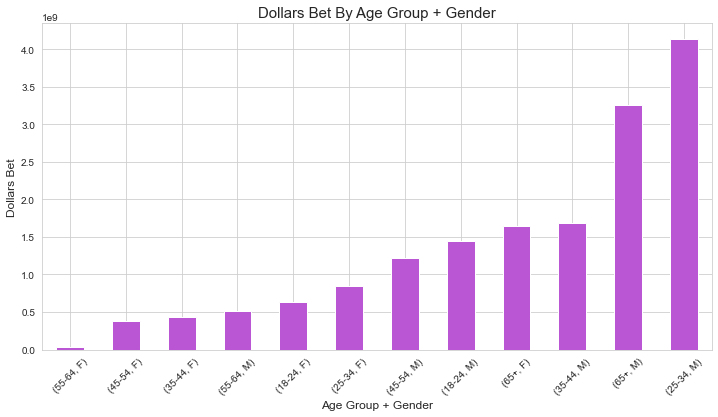

In [59]:
fig, ax = plt.subplots(figsize = (12,6))
grouped['value'].sum().sort_values().plot(kind='bar', color = 'mediumorchid')
plt.title('Dollars Bet By Age Group + Gender', fontsize = 15)
plt.xlabel('Age Group + Gender', fontsize = 12)
plt.ylabel('Dollars Bet', fontsize = 12)
plt.xticks(rotation = 45, fontsize = 10);

  <span style="color: blue">
    
__Key Takeaways__
- Our male customers 65 + and in the 25-34 age ranges showed to be our highest betters overall. 
- Our lowest demographic of betters in terms of dollar value spent, were female customers ages ranging 55-64. 

In [60]:
breakdown = pd.pivot_table(df20, index=['age_group'], columns = ['gender'], values=['value'], aggfunc='sum')

Text(0, 0.5, 'Dollars Bet')

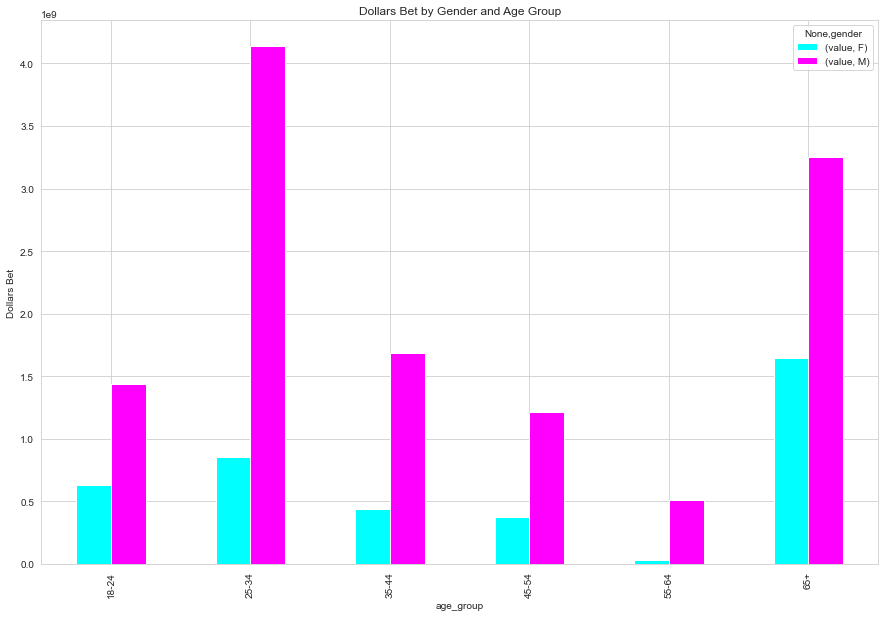

In [61]:

fig,breakdown.plot.bar(figsize=(15,10),title='Dollars Bet by Gender and Age Group', colormap ='cool'), \
plt.xlabel('age_group'),
plt.ylabel('Dollars Bet')

  <span style="color: blue">
In terms of dollars bet, males across all age groups, made higher dollar value bets in comparison to their female counterpart. Although still a noticeable difference, the age group with the least amount of difference of dollars bet by gender was seen within the 65+ age group. 

__BRAND ANALYSIS__

Now that we've gotten initial overview of the number of customers and dollars bet, let's see what products/brands that we offer performed the best amongst our customer base. 

In [62]:
print('Number of Customers Per Brand in 2020')
grouped =df20.groupby([(df20.brand)])
grouped['customers'].agg([np.sum,np.mean])

Number of Customers Per Brand in 2020


,sum,mean
brand,,
Apple,980316,308.566572
Banana,916996,276.536791
Blueberry,3629523,872.481490
Grapefruit,793139,368.216806
Melon,8095274,1866.991236
Orange,1343805,487.062341
Pear,1634338,441.951866
Strawberry,555584,193.112270


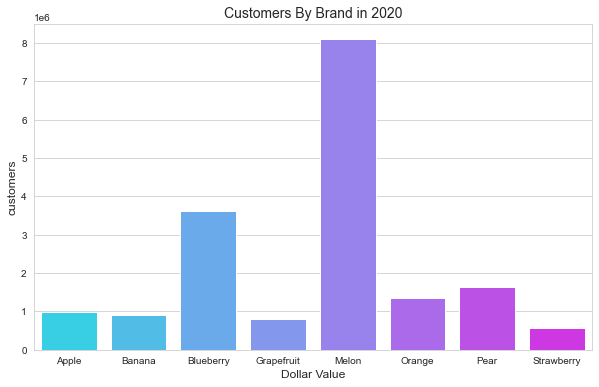

In [63]:
product = df20.groupby(by =['brand'], as_index = False)['customers'].sum()
plt.figure(figsize = (10,6))
sns.set_style('whitegrid')
sns.barplot(x = 'brand',
           y = 'customers',
           data = product,
           palette = 'cool')
plt.xlabel('Dollar Value', fontsize =12)
plt.ylabel('customers', fontsize =12)
plt.title('Customers By Brand in 2020', fontsize = 14)
plt.show();

In [64]:
breakdown = df20.groupby('brand')['customers'].sum()
breakdown = breakdown.div(breakdown.sum().astype(float)).round(2)*100

<AxesSubplot:title={'center':'PERCENTAGE CUSTOMERS BY BRAND'}, ylabel='brand'>

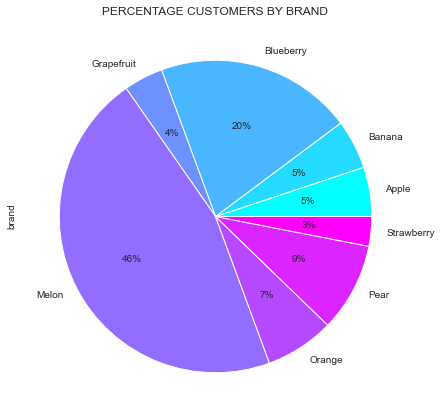

In [65]:
fig = plt.figure(figsize =(7,8))
breakdown.plot.pie(label=('brand'), title = "PERCENTAGE CUSTOMERS BY BRAND",colormap='cool', autopct='%1.0f%%')

<span style="color: blue">
    
- A high level overview, indicates that our Melon brand performed the best in 2020. Not only did it perform the best, but there is a noticeable difference in terms of betting customers gravitating towards that brand compared to the 2nd best performing brand, Blueberry. A noticeable number of 8,095,274 customers preferred our Melon brand compared to just 3,629,523 for our second highly favored brand, Blueberry. A difference of 4,465,751. 
- Our lowest performing brand is our Strawberry brand making up only 3% of our customer base. 

In [66]:
print('Dollars Bet Per Brand for 2020')
grouped =df20.groupby([(df20.brand)])
grouped['value'].agg([np.sum,np.mean])

Dollars Bet Per Brand for 2020


,sum,mean
brand,,
Apple,1220094490,3.840398e+05
Banana,1079938616,3.256751e+05
Blueberry,3369219288,8.099085e+05
Grapefruit,476214568,2.210838e+05
Melon,6349394908,1.464344e+06
Orange,1102320037,3.995361e+05
Pear,1826376988,4.938824e+05
Strawberry,791254246,2.750275e+05


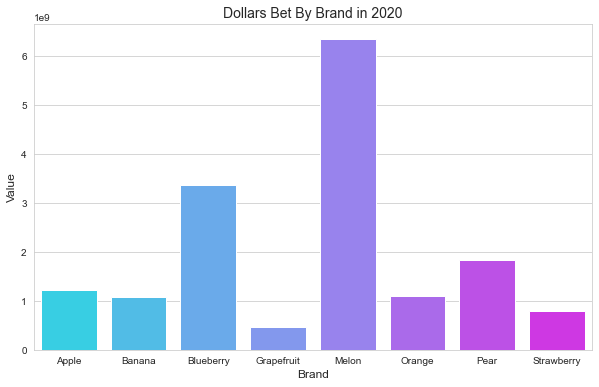

In [67]:
product = df20.groupby(by =['brand'], as_index = False)['value'].sum()
plt.figure(figsize = (10,6))
sns.set_style('whitegrid')
sns.barplot(x = 'brand',
           y = 'value',
           data = product,
           palette = 'cool')
plt.xlabel('Brand', fontsize =12)
plt.ylabel('Value', fontsize =12)
plt.title('Dollars Bet By Brand in 2020', fontsize = 14)
plt.show();

In [68]:
breakdown = df20.groupby('brand')['value'].sum()
breakdown = breakdown.div(breakdown.sum().astype(float)).round(2)*100

<AxesSubplot:title={'center':'PERCENTAGE OF DOLLARS BET BY BRAND'}, ylabel='brand'>

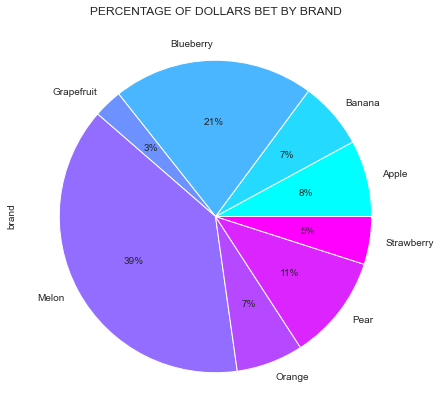

In [69]:
fig = plt.figure(figsize =(7,8))
breakdown.plot.pie(label=('brand'), title = "PERCENTAGE OF DOLLARS BET BY BRAND",colormap='cool', autopct='%1.0f%%')

  <span style="color: blue">
    
- Our Melon and Blueberry brands being highly favored, also translated into dollar values. Customers bet the most dollars these brands, a total of 6,349,394,908(AUD dollars) and $3,369,219,288 were spent on these brands respectively.
 
    - Although, this analysis is focused on 2020 numbers I was curious to see if this trend held true even during the last 6 months of 2019, and it did. The Melon and Blueberry brand were still our top contenders amongst our betting customers.
    


In [70]:
print('Customers Per Brand for 2020')
grouped =df20.groupby([(df20.months), df20.brand])
grouped['customers'].agg([np.sum,np.mean])

Customers Per Brand for 2020


sum         mean
months brand                          
Apr    Apple        47619   203.500000
       Banana       55256   224.617886
       Blueberry   275875   809.017595
       Grapefruit   58016   345.333333
       Melon       390577  1132.107246
...                   ...          ...
Sep    Grapefruit   67035   347.331606
       Melon       835029  2168.906494
       Orange       99645   325.637255
       Pear        149063   454.460366
       Strawberry   65984   243.483395

[96 rows x 2 columns]

In [71]:
8095274-555584

7539690

In [72]:
month = df20.groupby(by =['brand'])['value'].sum()
month.sort_values(ascending = False)

brand
Melon         6349394908
Blueberry     3369219288
Pear          1826376988
Apple         1220094490
Orange        1102320037
Banana        1079938616
Strawberry     791254246
Grapefruit     476214568
Name: value, dtype: int64

Let's take a look at what each age group preferred

In [73]:
print('Customers Per Brand and Age Group in 2020')
grouped =df20.groupby([(df20.age_group), df20.brand])
grouped['customers'].agg([np.sum,np.mean])

Customers Per Brand and Age Group in 2020


sum         mean
age_group brand                           
18-24     Apple        153560   233.729072
          Banana       123405   184.738024
          Blueberry    331153   420.244924
          Grapefruit    80357   167.062370
          Melon       1136410  1404.709518
          Orange       179743   331.018416
          Pear         212826   291.542466
          Strawberry    76088   127.664430
25-34     Apple        323530   430.798935
          Banana       272089   356.137435
          Blueberry    844149   968.060780
          Grapefruit   168385   332.776680
          Melon       2192894  2480.649321
          Orange       375688   620.971901
          Pear         436859   528.245466
          Strawberry   157903   228.183526
35-44     Apple        123496   234.783270
          Banana       131916   244.288889
          Blueberry    481684   727.619335
          Grapefruit   136775   413.217523
          Melon       1117257  1558.238494
          Orange       178824   399.160714
          Pear         245002   411.768067
          Strawberry    81511   171.241597
45-54     Apple         82237   193.498824
          Banana        76776   164.051282
          Blueberry    378957   561.417778
          Grapefruit    59373   227.482759
          Melon        693397  1022.709440
          Orange       124477   301.397094
          Pear         159677   287.188849
          Strawberry    58103   143.464198
55-64     Apple         30537   154.227273
          Banana        30015   150.829146
          Blueberry    117959   336.065527
          Grapefruit    12544   145.860465
          Melon        304634   721.881517
          Orange        50959   246.178744
          Pear          64797   237.351648
          Strawberry    18872   125.813333
65+       Apple        266956   430.574194
          Banana       282795   417.717873
          Blueberry   1475621  1817.267241
          Grapefruit   335705   686.513292
          Melon       2650682  3209.058111
          Orange       434114   799.473297
          Pear         515177   718.517434
          Strawberry   163107   292.306452

In [74]:
breakdown = pd.pivot_table(df20, index=['age_group'], columns = ['brand'], values=['customers'], aggfunc='sum')

<Figure size 432x288 with 0 Axes>

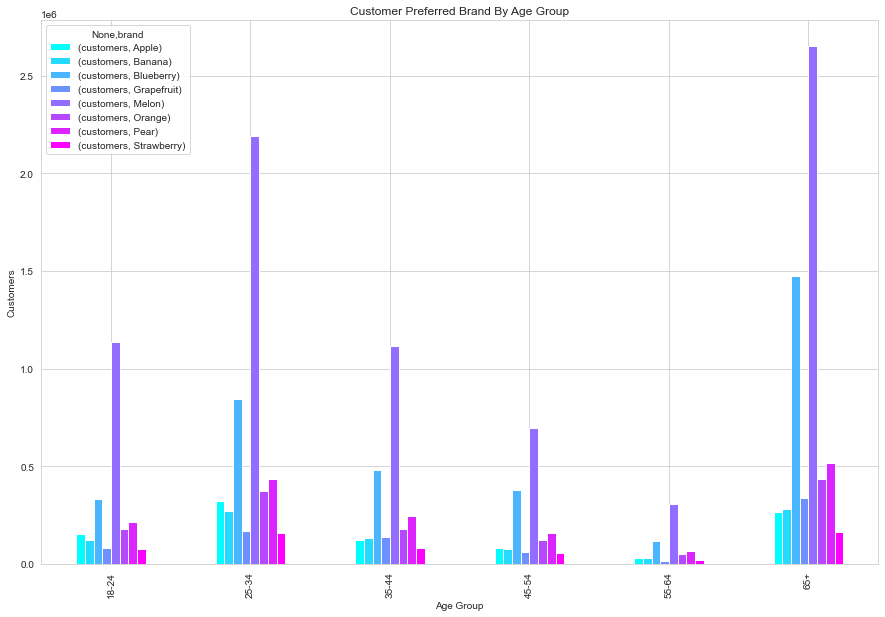

In [75]:
plt.figure(); breakdown.plot.bar(figsize=(15,10), title='Customer Preferred Brand By Age Group', colormap ='cool'), \
plt.xlabel('Age Group'),
plt.ylabel('Customers');

In [76]:
print('Dollars Bet Per Brand for 2020')
grouped =df20.groupby([(df20.age_group), df20.brand])
grouped['value'].agg([np.sum,np.mean])

Dollars Bet Per Brand for 2020


sum          mean
age_group brand                               
18-24     Apple        187318740  2.851122e+05
          Banana       150691834  2.255866e+05
          Blueberry    295913272  3.755245e+05
          Grapefruit    51178295  1.063998e+05
          Melon        914707559  1.130664e+06
          Orange       137121746  2.525262e+05
          Pear         224362835  3.073463e+05
          Strawberry   113460048  1.903692e+05
25-34     Apple        400132396  5.327995e+05
          Banana       363893504  4.763004e+05
          Blueberry    893090126  1.024186e+06
          Grapefruit   118196092  2.335891e+05
          Melon       2019770787  2.284809e+06
          Orange       358608692  5.927416e+05
          Pear         560671434  6.779582e+05
          Strawberry   275698664  3.984085e+05
35-44     Apple        146269745  2.780794e+05
          Banana       151012963  2.796536e+05
          Blueberry    503210144  7.601362e+05
          Grapefruit    75119854  2.269482e+05
          Melon        754802968  1.052724e+06
          Orange       130786975  2.919352e+05
          Pear         250042770  4.202399e+05
          Strawberry   106698372  2.241562e+05
45-54     Apple         96631931  2.273692e+05
          Banana       108188142  2.311712e+05
          Blueberry    396496326  5.874020e+05
          Grapefruit    42415026  1.625097e+05
          Melon        523157609  7.716189e+05
          Orange        89710109  2.172158e+05
          Pear         251242560  4.518751e+05
          Strawberry    86282146  2.130423e+05
55-64     Apple         48032740  2.425896e+05
          Banana        34245105  1.720860e+05
          Blueberry     91046432  2.593915e+05
          Grapefruit     9500115  1.104665e+05
          Melon        224825203  5.327611e+05
          Orange        69886565  3.376163e+05
          Pear          50107800  1.835451e+05
          Strawberry    16343548  1.089570e+05
65+       Apple        341708938  5.511434e+05
          Banana       271907068  4.016353e+05
          Blueberry   1189462988  1.464856e+06
          Grapefruit   179805186  3.676998e+05
          Melon       1912130782  2.314928e+06
          Orange       316205950  5.823314e+05
          Pear         489949589  6.833328e+05
          Strawberry   192771468  3.454686e+05

In [77]:
breakdown = pd.pivot_table(df20, index=['age_group'], columns = ['brand'], values=['value'], aggfunc='sum')

<Figure size 432x288 with 0 Axes>

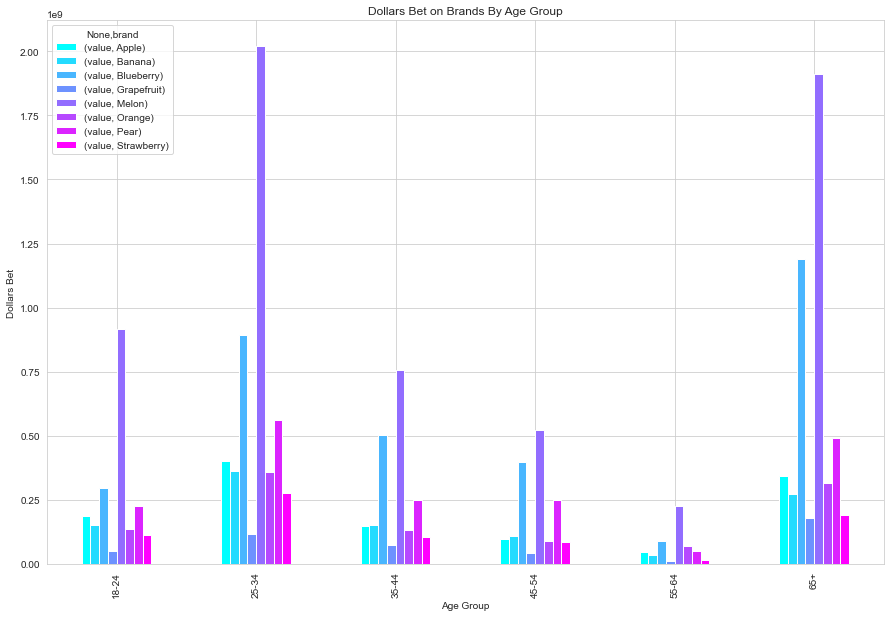

In [78]:
plt.figure(); breakdown.plot.bar(figsize=(15,10),title='Dollars Bet on Brands By Age Group', colormap ='cool'), \
plt.xlabel('Age Group'),
plt.ylabel('Dollars Bet');

  <span style="color: blue">
    
- As expected, across all age groups our Melon brand proved to be the most popular in both the quantity of betting customers and the dollar value bet using this brand.  
- Our 55-64 age group, had the smallest number of customers and dollar value spent regardless of brand. 

Let's explore what brands were preferred by state. 

In [79]:
print('Customers Per Brand By State in 2020')
grouped =df20.groupby([(df20.state), df20.brand])
grouped['customers'].agg([np.sum,np.mean])

Customers Per Brand By State in 2020


sum         mean
state brand                           
ACT   Apple          3418    38.404494
      Banana         4441    45.316327
      Blueberry     16256    67.733333
      Grapefruit      815    42.894737
      Melon         29359   108.335793
...                   ...          ...
WA    Grapefruit   585403   978.934783
      Melon       1066694  1712.189406
      Orange       177424   410.703704
      Pear         198579   350.846290
      Strawberry    67760   151.250000

[64 rows x 2 columns]

In [80]:
breakdown = pd.pivot_table(df20, index=['state'], columns = ['brand'], values=['customers'], aggfunc='sum')

<Figure size 432x288 with 0 Axes>

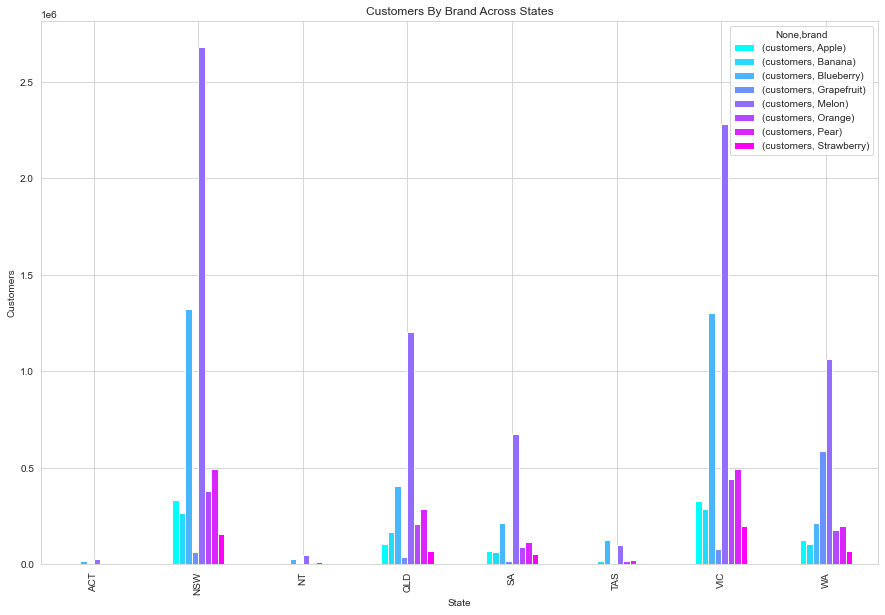

In [81]:
plt.figure(); breakdown.plot.bar(figsize=(15,10),title='Customers By Brand Across States', colormap ='cool'), \
plt.xlabel('State'),
plt.ylabel('Customers');

 <span style="color: blue">
With the exception of Tasmania, our Melon brand proved to be the most popular in all the other states across Australia. 

In [82]:
print('Dollar Bet By Brands By State')
grouped =df20.groupby([(df20.state), df20.brand])
grouped['value'].agg([np.sum,np.mean])

Dollar Bet By Brands By State


sum          mean
state brand                              
ACT   Apple         6618062  7.436025e+04
      Banana        3427439  3.497387e+04
      Blueberry    13748399  5.728500e+04
      Grapefruit    1098719  5.782732e+04
      Melon        23413279  8.639586e+04
...                     ...           ...
WA    Grapefruit  320236588  5.355127e+05
      Melon       723074972  1.160634e+06
      Orange      140690551  3.256726e+05
      Pear        215784930  3.812455e+05
      Strawberry   70998694  1.584792e+05

[64 rows x 2 columns]

In [83]:
breakdown = pd.pivot_table(df20, index=['state'], columns = ['brand'], values=['value'], aggfunc='sum')

<Figure size 432x288 with 0 Axes>

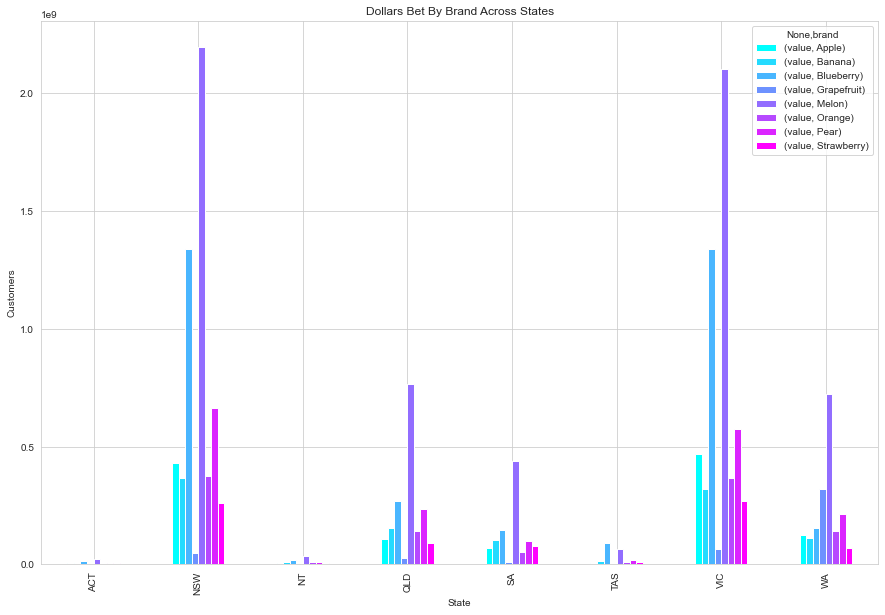

In [84]:
plt.figure(); breakdown.plot.bar(figsize=(15,10),title='Dollars Bet By Brand Across States', colormap ='cool'), \
plt.xlabel('State'),
plt.ylabel('Customers');

 <span style="color: blue">
With the exception of Tasmania, our Melon brand also proved to be the most popular in terms of dollars spent, in all the other states across Australia. 

Let's explore what brands were preferred by Gender. 

In [85]:
breakdown = pd.pivot_table(df20, index=['gender'], columns = ['brand'], values=['customers'], aggfunc='sum')

<Figure size 432x288 with 0 Axes>

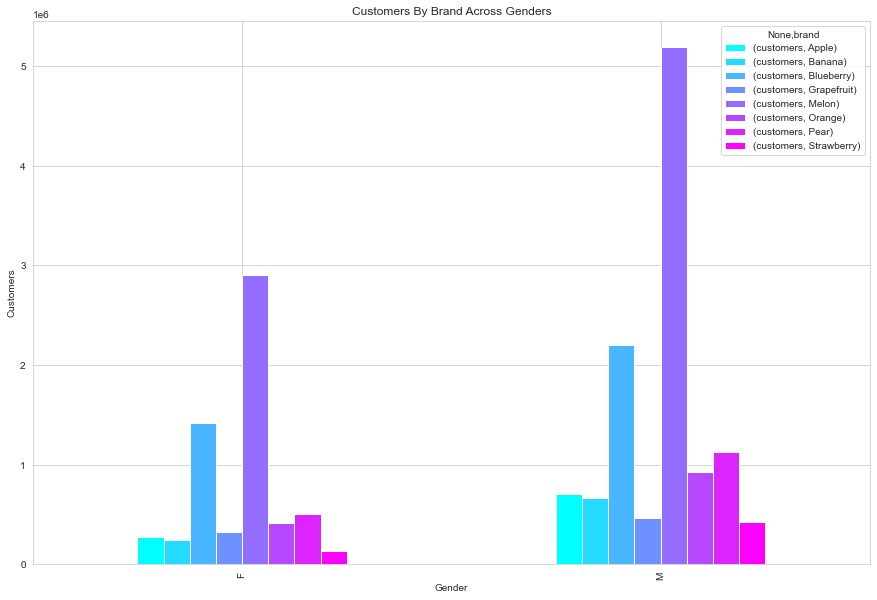

In [86]:
plt.figure(); breakdown.plot.bar(figsize=(15,10),title='Customers By Brand Across Genders', colormap ='cool'), \
plt.xlabel('Gender'),
plt.ylabel('Customers');

In [87]:
breakdown = pd.pivot_table(df20, index=['gender'], columns = ['brand'], values=['value'], aggfunc='sum')

<Figure size 432x288 with 0 Axes>

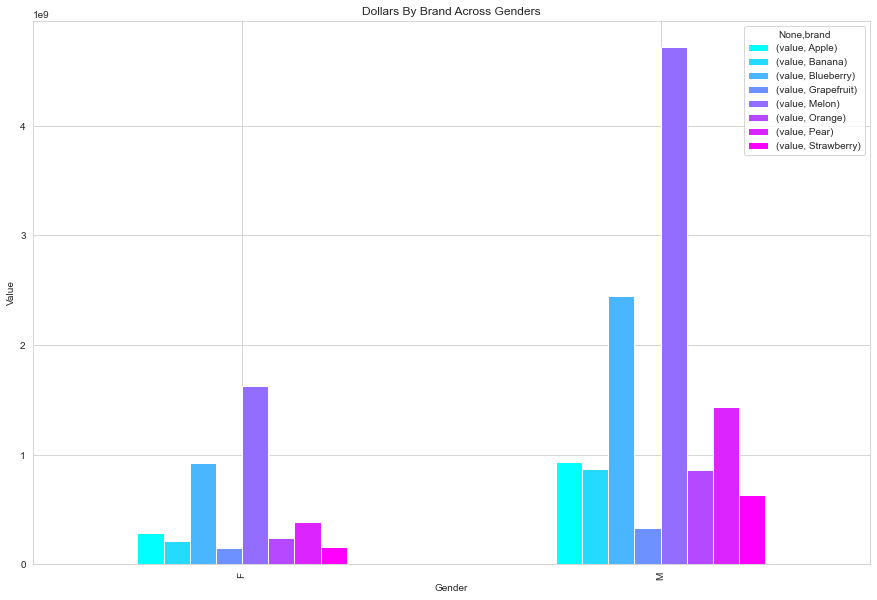

In [88]:
plt.figure(); breakdown.plot.bar(figsize=(15,10),title='Dollars By Brand Across Genders', colormap ='cool'), \
plt.xlabel('Gender'),
plt.ylabel('Value');

 <span style="color: blue">
Our Melon brand still proved to be the most popular amongst the genders, in terms of number of customers and dollars bet. 